In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from config import api_key
from citipy import citipy

In [2]:
# generate random lat and lon
lat_list = np.random.uniform(-90,90,2000)
lon_list = np.random.uniform(-180,180,2000)

In [3]:
# create a randomly selected city dataframe using citipy
city_list = []
country_list = []
for i in range(len(lat_list)):
    city = citipy.nearest_city(lat_list[i], lon_list[i])
    city_name = city.city_name
    country_code = city.country_code   
    if city_name not in city_list:
        city_list.append(city_name)
        country_list.append(country_code)
city_df = pd.DataFrame({"City": city_list,
                        "Country": country_list,
                        "Temperature (F)" : "",
                        "Humidity": "",
                        "Cloudiness": "",
                        "Wind Speed (mph)": "",
                        "Latitude": "",
                        "Longitude": ""
                        })
print(len(city_df["City"]))

735


In [4]:
# request from open weather map api and print the log info
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="
for index, row in city_df.iterrows():
    response = requests.get(url+row["City"]+","+row["Country"])
    print(f"Request {index} {row['City']}, URL: {response.url}")    
    response_data = response.json()
    try:
        city_df.set_value(index, "Temperature (F)", response_data['main']['temp'])
        city_df.set_value(index, "Humidity", response_data['main']['humidity'])
        city_df.set_value(index, "Cloudiness", response_data['clouds']['all'])
        city_df.set_value(index, "Wind Speed (mph)", response_data['wind']['speed'])
        city_df.set_value(index, "Latitude", response_data['coord']['lat'])
        city_df.set_value(index, "Longitude", response_data['coord']['lon'])
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

Request 0 vanimo, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=vanimo,pg


/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/jiemeizhang/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added ba

Request 1 port alfred, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=port%20alfred,za
Request 2 karakol, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=karakol,kg
Request 3 beringovskiy, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=beringovskiy,ru
Request 4 moroto, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=moroto,ug
Request 5 camacha, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=camacha,pt
Request 6 imeni poliny osipenko, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=imeni%20poliny%20osipenko,ru
Request 7 taolanaro, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=impe

Request 56 stokmarknes, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=stokmarknes,no
Request 57 hobart, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=hobart,au
Request 58 noceto, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=noceto,it
Request 59 lorengau, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=lorengau,pg
Request 60 jalu, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=jalu,ly
Request 61 tiarei, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=tiarei,pf
Request 62 sheridan, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=sheridan,us
Request 63 atuona, URL: htt

Request 113 saskylakh, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=saskylakh,ru
Request 114 vizinga, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=vizinga,ru
Request 115 utiroa, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=utiroa,ki
Missing field/result... skipping.
Request 116 matara, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=matara,lk
Request 117 ribeira grande, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=ribeira%20grande,pt
Request 118 ternate, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=ternate,id
Request 119 hithadhoo, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada45682

Request 169 teya, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=teya,ru
Request 170 airai, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=airai,pw
Missing field/result... skipping.
Request 171 kongoussi, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=kongoussi,bf
Request 172 simao, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=simao,cn
Request 173 kieta, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=kieta,pg
Request 174 lebu, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=lebu,cl
Request 175 satitoa, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=satitoa,ws
Missin

Request 226 hecun, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=hecun,cn
Request 227 skegness, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=skegness,gb
Request 228 constitucion, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=constitucion,cl
Request 229 deputatskiy, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=deputatskiy,ru
Request 230 provideniya, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=provideniya,ru
Request 231 alyangula, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=alyangula,au
Request 232 mareeba, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=mar

Request 282 komsomolskiy, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=komsomolskiy,ru
Request 283 sharan, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=sharan,af
Request 284 rajshahi, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=rajshahi,bd
Request 285 vanavara, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=vanavara,ru
Request 286 corinto, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=corinto,ni
Request 287 berbera, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=berbera,so
Request 288 portoferraio, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=portoferraio,i

Request 339 clarence town, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=clarence%20town,bs
Request 340 necochea, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=necochea,ar
Request 341 korla, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=korla,cn
Request 342 sobolevo, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=sobolevo,ru
Request 343 saint-augustin, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=saint-augustin,ca
Request 344 bonavista, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=bonavista,ca
Request 345 kholodnyy, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial

Request 396 mount isa, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=mount%20isa,au
Request 397 hermosillo, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=hermosillo,mx
Request 398 san quintin, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=san%20quintin,mx
Missing field/result... skipping.
Request 399 katsuura, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=katsuura,jp
Request 400 hobyo, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=hobyo,so
Request 401 egvekinot, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=egvekinot,ru
Request 402 rawannawi, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120

Request 453 alibag, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=alibag,in
Request 454 dasoguz, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=dasoguz,tm
Request 455 camargo, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=camargo,bo
Request 456 lasa, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=lasa,cn
Missing field/result... skipping.
Request 457 pyay, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=pyay,mm
Request 458 santa isabel, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=santa%20isabel,mx
Request 459 saurimo, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q

Request 508 pascagoula, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=pascagoula,us
Request 509 flinders, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=flinders,au
Request 510 bilibino, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=bilibino,ru
Request 511 sambava, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=sambava,mg
Request 512 turukhansk, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=turukhansk,ru
Request 513 caravelas, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=caravelas,br
Request 514 kristiinankaupunki, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=

Request 564 itambe, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=itambe,br
Request 565 ryotsu, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=ryotsu,jp
Request 566 krasnorechenskiy, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=krasnorechenskiy,ru
Request 567 roald, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=roald,no
Request 568 indiaroba, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=indiaroba,br
Request 569 venice, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=venice,us
Request 570 yubari, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=yubari,jp
Missing fi

Request 620 minab, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=minab,ir
Request 621 alakurtti, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=alakurtti,ru
Request 622 jawhar, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=jawhar,so
Request 623 chunskiy, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=chunskiy,ru
Request 624 soligalich, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=soligalich,ru
Request 625 samandag, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=samandag,tr
Missing field/result... skipping.
Request 626 kushmurun, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&unit

Request 676 la chapelle-sur-erdre, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=la%20chapelle-sur-erdre,fr
Request 677 ventersburg, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=ventersburg,za
Request 678 aflu, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=aflu,dz
Missing field/result... skipping.
Request 679 neuquen, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=neuquen,ar
Request 680 basco, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=basco,ph
Request 681 latung, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=latung,ph
Request 682 santa vitoria do palmar, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0

Request 734 gryazi, URL: http://api.openweathermap.org/data/2.5/weather?appid=6c7d0a89c4f1a465f8120ada4568232f&units=imperial&q=gryazi,ru


In [5]:
# replace empty cell by nan, drop rows including nan, print final city number with complete data
city_df.replace('', np.nan, inplace=True)
city_df = city_df.dropna(axis=0, how='any')
print(len(city_df["City"]))

637


In [11]:
# display dataframe
city_df.head()

,City,Cloudiness,Country,Humidity,Latitude,Longitude,Temperature (F),Wind Speed (mph)
0,vanimo,92.0,pg,100.0,-2.67,141.30,82.95,13.13
1,port alfred,92.0,za,80.0,-33.59,26.89,76.20,6.20
2,karakol,88.0,kg,92.0,42.49,78.39,26.97,1.61
3,beringovskiy,76.0,ru,96.0,63.05,179.32,28.05,5.19
4,moroto,32.0,ug,66.0,2.53,34.66,72.33,6.31


In [6]:
# save retrieved data to csv
city_df.to_csv("WeatherInWorldCities.csv")

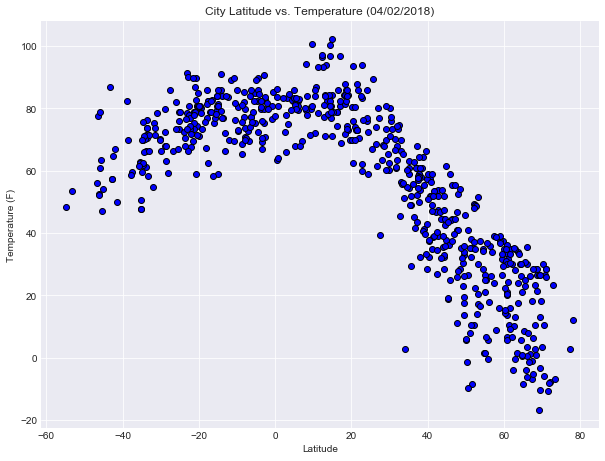

In [7]:
# scatter plot of Latitude vs Temperature
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
plt.scatter(city_df["Latitude"], city_df["Temperature (F)"], color="b",edgecolor="black",linewidths=1)
plt.title("City Latitude vs. Temperature (04/02/2018)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("Latitude_Temperature.png")
plt.show()

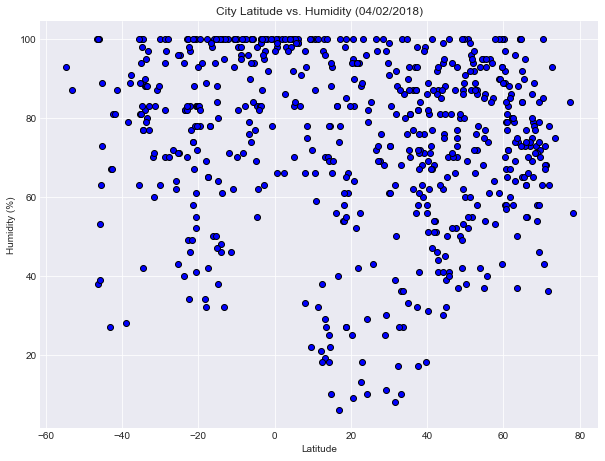

In [8]:
# scatter plot of Latitude vs Humidity
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
plt.scatter(city_df["Latitude"], city_df["Humidity"], color="b",edgecolor="black",linewidths=1)
plt.title("City Latitude vs. Humidity (04/02/2018)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("Latitude_Humidity.png")
plt.show()

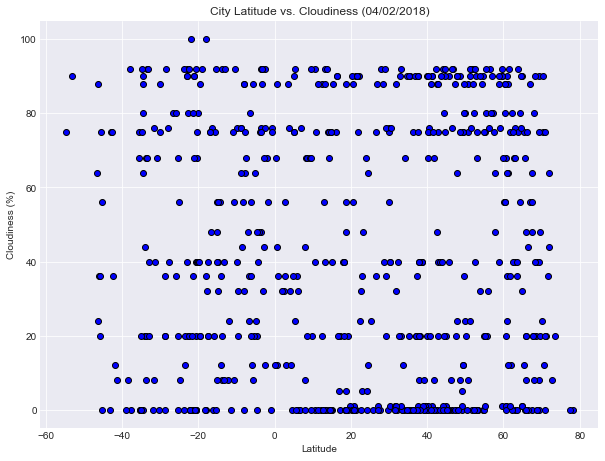

In [9]:
# scatter plot of Latitude vs Cloudiness
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], color="b",edgecolor="black",linewidths=1)
plt.title("City Latitude vs. Cloudiness (04/02/2018)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("Latitude_Cloudiness.png")
plt.show()

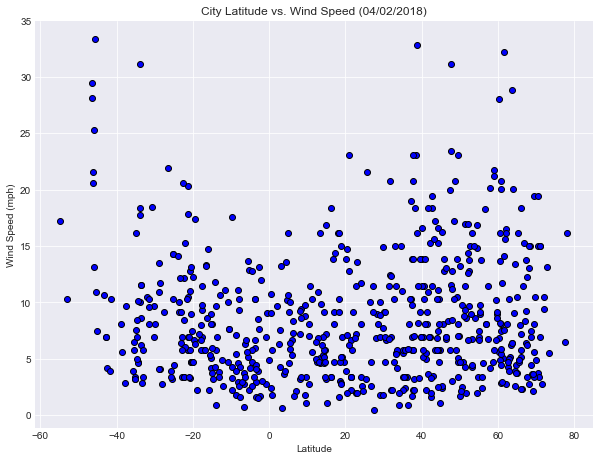

In [10]:
# scatter plot of Latitude vs Wind Speed
plt.figure(figsize=(10,7.5))
plt.style.use('seaborn-darkgrid')
plt.scatter(city_df["Latitude"], city_df["Wind Speed (mph)"], color="b",edgecolor="black",linewidths=1)
plt.title("City Latitude vs. Wind Speed (04/02/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("Latitude_WindSpeed.png")
plt.show()